# APS1070
#### Basic Principles and Models - Project 1
**Deadline: Oct 1, 9PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Ali Mohamad Yassine  

Student ID: 1008618113

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).


 <font color='red'>**Remember to push your work on GitHub and share the link of your private repo on Quercus.**</font> 




# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
original_dataset = load_breast_cancer()

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? 30
* How many observations have a 'mean area' of greater than 700? 171
* How many participants tested `Malignant`? 212
* How many participants tested `Benign`? 357

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#number of features in a dataset answer to question1
print("The number of features in te dataset is : ",len(original_dataset.feature_names))

The number of features in te dataset is :  30


In [ ]:
#Dataframe
df=pd.DataFrame(original_dataset.data,columns=original_dataset.feature_names)
df.insert(30, 'target', original_dataset.target)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
#with a mean area bigger than  700
print("Observation with mean area>700:",df[df['mean area'] > 700].shape[0])

Observation with mean area>700: 171


In [ ]:
#malignant number 
malignant = np.count_nonzero(original_dataset.target == 0)
print("Malignant participants: ",malignant)

Malignant paricipants:  212


In [ ]:
#benign  is 1 in target so just sum
benign=np.sum(original_dataset.target)
print("Benign paricipants: ",benign)

Benign paricipants:  357


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(original_dataset.data,original_dataset.target, test_size=0.3, random_state=0)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**




Answer (code and results below): 

Objectively, the difference between the two plots is only the scaling on the x and y axis. Before normalization, the axis had very different values : 
- the x axis values were ranging from approx. 0  to 0.14 (and more)
- the y axis values were ranging from approx. 40 to 180 (and more)

One should note that the form of the graph is the same since the graphic scale for x axis is different than the one used for y axis. Plotting them on the same scale before standarization for x and y between 0 to 100 will give different results (see below the original plot). It is clear that the y axis 'dominates' the plot in this case. 

However after standardizing:
- The x and y axis values range are nearly the same since all the features values have mean 0 and standard deviation of 1.

As explained in the lecture, the feature with the higher values distribution (mean perimeter here) will have a considerable impact on the algorithm than the features with smaller values (compactness error here). Analogically, if a certain ML algorithm (knn for example) is used to predict the price of real estate in a certain country based on two features number of bedrooms (takes 1 digit number normally) and size of real estate in m^2 (2 to 3 digit numbers). If we do not normalize the algorithm will make its predictions based on the size feature.

The advantage is that standarization allows all the features to have the same contribution in the training phase.
The advantage of standardizing is that it enforces all the features to have the same contribution in the machine learning algorithm training and prediction. The KNN does not have any idea about the distribution of the data (an algorithm following steps), this is why it's better to standarize the data before proceeding with the algorithm.

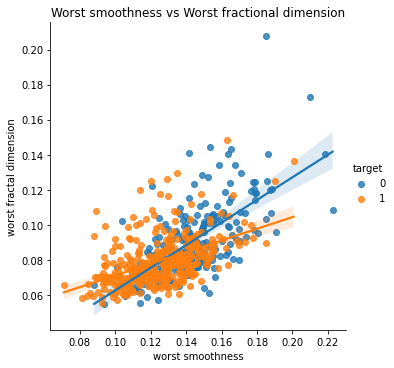

In [ ]:
#Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.
import seaborn as sns
sns.lmplot(x='worst smoothness',y='worst fractal dimension',data=df,hue='target').set(title='Worst smoothness vs Worst fractional dimension')

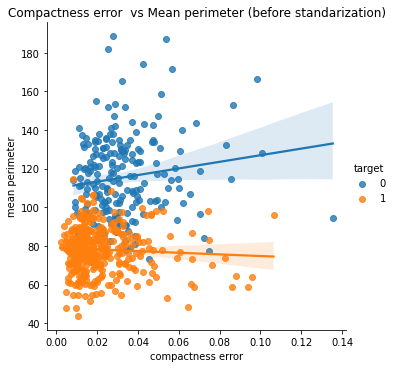

In [ ]:
#Show a plot as above, but with two features with very different scales. Standardize the data and plot those features againShow a plot as above, but with two features with very different scales.
#Standardize the data and plot those features again
#before 
sns.lmplot(x='compactness error',y='mean perimeter',data=df,hue='target').set(title='Compactness error  vs Mean perimeter (before standarization)')

if we draw on the same graph with x and y axis having the same scale

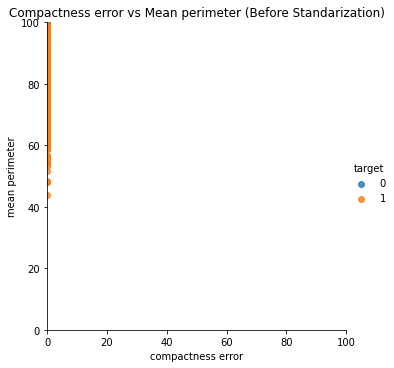

In [ ]:

p=sns.lmplot(x='compactness error',y='mean perimeter',data=df,hue='target').set(title='Compactness error vs Mean perimeter (Before Standarization)')
p.set(xlim=(0, 100))
p.set(ylim=(0, 100))


Standarizing the data 

In [ ]:
#standarization process
from sklearn.preprocessing import StandardScaler
# normalize all the data 
normalized_col=StandardScaler().fit_transform(df[['compactness error','mean perimeter']])
normalized_coldf=pd.DataFrame(normalized_col,columns=['normalized_compactness error','normalized_mean_perimeter'])
#add the targets 0s and 1s
normalized_coldf.insert(2, 'target', original_dataset.target)
normalized_coldf

,normalized_compactness error,normalized_mean_perimeter,target
0,1.316862,1.269934,0
1,-0.692926,1.685955,0
2,0.814974,1.566503,0
3,2.744280,-0.592687,0
4,-0.048520,1.776573,0
...,...,...,...
564,0.191805,2.060786,0
565,-0.069758,1.615931,0
566,0.661277,0.672676,0
567,2.017716,1.982524,0


Our plot after standarization 

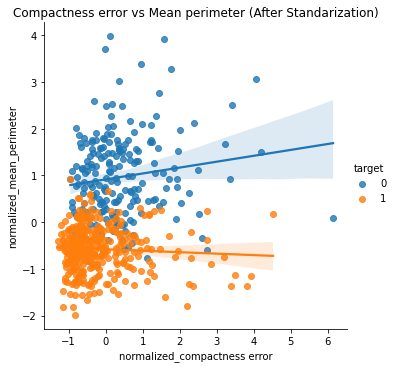

In [ ]:
#After standarization 
sns.lmplot(x='normalized_compactness error',y='normalized_mean_perimeter',data=normalized_coldf,hue='target').set(title='Compactness error vs Mean perimeter (After Standarization)')

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. 

Done in a loop in the function below.

2.   What is the best `k`? What is the highest cross-validation accuracy?

k=10 is the best k (and also k=11 give the same validation accuracy) corresponding to the highest cross-validation accuracy is 0.9346518987341772. We will take k=10  (not k=11) since it is more efficient (one less neighbor required -->less computations for the knn) 

3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). 
(Check the graph below in the last three cells before part 3). 

- When k is between 1 and 10: we notice that the validation curve is below the training curve. The knn algorithm is doing well in in training but not in validation --> overfitting the data.

- When k is large (between 73-75 and 100): we notice that the validation curve is fluctauating a little above the training curve. The knn algorithm is doing well in in validation but not as 'good' in the training --> slightly underfitting the data.




In [ ]:
#Question 1
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
def ktimes_knn(X_train,y_train):
 
  temp=[]
  temp2=[]
  for k in range(1,101):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train, y_train, cv=5,return_train_score=True)
    train_acc=scores['train_score'].mean()
    val_acc= scores['test_score'].mean()
    temp.append(val_acc)
    temp2.append(train_acc)
  
  maxsofar=temp[0]
  for i in range(0,len(temp)):
    #find the maximum k 
    if(temp[i]>maxsofar):
      maxsofar=temp[i]
  bestk=temp.index(maxsofar)+1
  return temp,temp2,maxsofar,bestk

validation_accuracies,training_accuracies,maxsofar_original,bestk=ktimes_knn(X_train,y_train)
print("Validation accuracy: ",validation_accuracies)
print("Training accuracy: ",training_accuracies)
print("The highest cross validation accuracy is:",maxsofar_original)
print("The first best k corresponding to the highest cross validation accuracy is:",bestk)

Validation accuracy:  [0.9171202531645569, 0.9170886075949367, 0.9272151898734178, 0.927120253164557, 0.919620253164557, 0.9246518987341773, 0.9321518987341773, 0.9321518987341773, 0.9246202531645569, 0.9346518987341772, 0.9346518987341772, 0.9321202531645569, 0.9221518987341772, 0.9296835443037976, 0.9221518987341772, 0.9246202531645569, 0.9120569620253164, 0.9195886075949368, 0.9120886075949368, 0.9145886075949367, 0.9070253164556963, 0.9095253164556961, 0.9070569620253165, 0.9070253164556961, 0.9045253164556962, 0.9095569620253163, 0.9095569620253163, 0.9095569620253163, 0.9095569620253163, 0.9095569620253163, 0.9045569620253164, 0.9070569620253165, 0.9070569620253165, 0.9095569620253166, 0.9095569620253166, 0.9070569620253164, 0.9070569620253165, 0.9095569620253166, 0.9095569620253166, 0.9095569620253166, 0.9070569620253165, 0.9095569620253166, 0.9095569620253166, 0.9095569620253166, 0.9020569620253165, 0.9070569620253165, 0.9020253164556962, 0.9095569620253166, 0.9045569620253164,

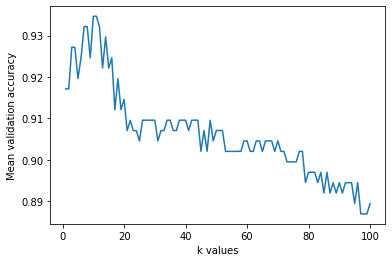

In [ ]:
import matplotlib.pyplot as plt

x=np.linspace(1,len(validation_accuracies),len(validation_accuracies))
plt.xlabel('k values')
plt.ylabel('Mean validation accuracy')
plt.plot(x,validation_accuracies)
  
plt.show()    


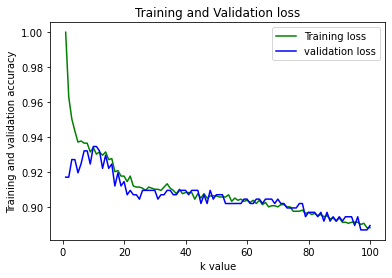

In [ ]:
#question 3 Comment on which ranges of k lead to underfitted or overfitted models (hint: compare training and validation curves!).

loss_train = training_accuracies
loss_val = validation_accuracies
x=np.linspace(1,len(validation_accuracies),len(validation_accuracies))
plt.xlabel('k value')
plt.ylabel('Training and validation accuracy')
plt.plot(x, loss_train, 'g', label='Training loss')
plt.plot(x, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('k value')
plt.ylabel('Training and validation accuracy')
plt.legend()
plt.show()

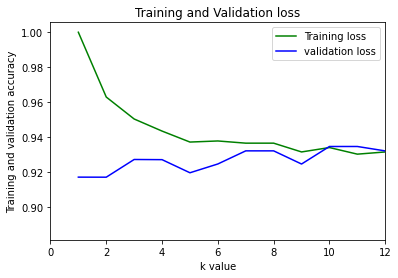

In [ ]:
# between k=1 and k=12
loss_train = training_accuracies
loss_val = validation_accuracies
x=np.linspace(1,len(validation_accuracies),len(validation_accuracies))
plt.xlabel('k value')
plt.ylabel('Training and validation accuracy')
plt.plot(x, loss_train, 'g', label='Training loss')
plt.plot(x, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('k value')
plt.ylabel('Training and validation accuracy')
plt.xlim(0,12)
plt.legend()
plt.show()

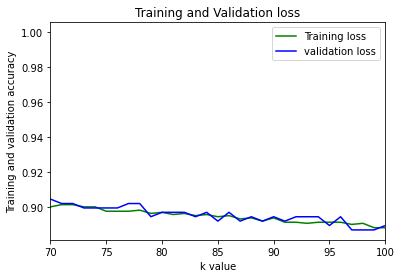

In [ ]:
# between k=70 and k=100
loss_train = training_accuracies
loss_val = validation_accuracies
x=np.linspace(1,len(training_accuracies),len(training_accuracies))
plt.xlabel('k value')
plt.ylabel('Training and validation accuracy')
plt.plot(x, loss_train, 'g', label='Training loss')
plt.plot(x, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('k value')
plt.ylabel('Training and validation accuracy')
plt.xlim(70,len(training_accuracies))
plt.legend()
plt.show()

## Part 3: Feature Selection [4 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use the following link to get familiar with extracting the feature impotance order of machine learning algorithms in Python: 

https://machinelearningmastery.com/calculate-feature-importance-with-python/

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to remove another feature. To do that we fit a new decision tree to the remaining features and identify the least important feature. 


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[3]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Each time, removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 1, fit a new tree on the reduced dataset and follow all the steps until you meet the stop condition. 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


This part will include the functions that will be called and used in our main function Feature_selector 

In [ ]:
from sklearn import tree

#finding the minimum and its index in a list of arrays: [(x,y),(z,w)] it will be used for finding the least important feature and its index
#there is more efficient way using argmin but I forgot to use it so I continued the code in this way
def finmin(l):
  mini=l[0][0]
  temp=0
  for i in range(0,len(l)):
    if l[i][0]<mini:
      mini=l[i][0]
      temp=i
  return mini,temp

# 1.Simple Function fitting a decision tree classifier on the training set
def fitdecisiontree(X_train,y_train):
  dt = tree.DecisionTreeClassifier(random_state=0)
  dt.fit(X_train,y_train)
  importance = dt.feature_importances_
  return importance 

# 2. Extracts the feature importance order of the decision tree model 
# enumerate() returns a tuple with the counter and value, so you don't have to increment the counter yourself.
def featureimportance(X_train,y_train):
  importance=fitdecisiontree(X_train,y_train)
  list_=[]
  for i,v in enumerate(importance):
    store=(v,i)
    list_.append(store)
  return list_,importance

# 3. the least important feature based on step 2.
def removeleast(X_train,y_train):
  list_,imp=featureimportance(X_train,y_train)
  leastimportance,featurenumber=finmin(list_) 
  return featurenumber

# 4.Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation


#Function returning the target of the original dataset. This number will be always used since y_train is not changing
def returntarget():
  return original_dataset.target


#fitting the knn 100 times and returning the best cross validation value and its corresponding k 
def trainnewknn(X_train,y_train):
  temp1,temp2,maxsofar2,bestk=ktimes_knn(X_train,y_train)
  return maxsofar2,bestk


Now let's implement step 1 to step 7 all in our main Feature_selector function  here

In [ ]:
def Feature_selector (X_train , y_train , tr=0.95):
  # the initial lists that will append
  removed_features=[]
  best_meancrossval=[]
  bestklist=[] 

  # the features names of our dataset we will use it to know the least important removed features 
  feature_n=original_dataset.feature_names.copy()

  #Full cross validation accuracy on original after tuning k
  maxsofar_original,bestk_original=trainnewknn(X_train,y_train)
  best_meancrossval.append(maxsofar_original)
  bestklist.append(bestk_original)

  #initialize maxsofar to whatever value >1 to be able to use it in the while loop condition 
  maxsofar=1

  while X_train.shape[1]>1 and maxsofar>tr*maxsofar_original:

    featurenumber=removeleast(X_train,y_train)
    removed_features.append(feature_n[featurenumber])
    feature_n=np.delete(feature_n,featurenumber,0)
    X_train=np.delete(X_train, featurenumber, axis=1)
    maxsofar,bestk=trainnewknn(X_train,y_train)
    best_meancrossval.append(maxsofar)
    bestklist.append(bestk)
    
  
  #return list removed features, and the corresponding mean cross-validation accuracy and k value when a feature was removed.
  return removed_features,best_meancrossval,bestklist



In [ ]:
removed_features,best_meancrossval,bestklist=Feature_selector (X_train , y_train ,0.95)
print("The list of the removed features: ",removed_features)
print("The best mean cross-validation accuracy after removing each feature: ",best_meancrossval)
print("Best k values (highest validation) when a feature was removed: ",bestklist)

The list of the removed features:  ['mean radius', 'mean texture', 'mean area', 'mean smoothness', 'mean compactness', 'mean perimeter', 'mean concavity', 'mean concave points', 'mean fractal dimension', 'texture error', 'perimeter error', 'compactness error', 'concavity error', 'smoothness error', 'concave points error', 'symmetry error', 'worst perimeter', 'worst smoothness', 'worst fractal dimension', 'worst radius', 'fractal dimension error', 'radius error', 'worst compactness', 'worst texture', 'mean symmetry', 'worst symmetry', 'worst concavity', 'area error', 'worst area']
The best mean cross-validation accuracy after removing each feature:  [0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.

Arranging them in a dataframe for better visualization

In [ ]:
removed_features_df=pd.DataFrame(np.array(removed_features),columns=['Dropped least important features from X_train after each iteration'])
removed_features_df

,Dropped least important features from X_train after each iteration
0,mean radius
1,mean texture
2,mean area
3,mean smoothness
4,mean compactness
5,mean perimeter
6,mean concavity
7,mean concave points
8,mean fractal dimension
9,texture error


In [ ]:
bestvalandkdf=pd.DataFrame(np.concatenate((np.array(best_meancrossval).reshape(-1,1), np.array(bestklist).reshape(-1,1)), axis=1),columns=['Best mean cross-validation accuracy','Corresponding first k value'])
bestvalandkdf

,Best mean cross-validation accuracy,Corresponding first k value
0,0.934652,10.0
1,0.934652,10.0
2,0.934652,10.0
3,0.914589,34.0
4,0.914589,34.0
5,0.914589,34.0
6,0.914589,34.0
7,0.914589,34.0
8,0.914589,34.0
9,0.914589,34.0


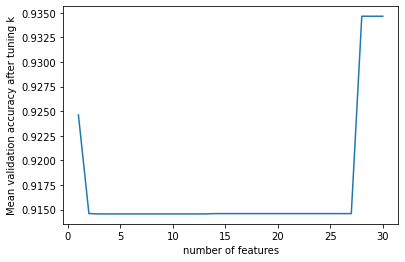

In [ ]:
#Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis)
#vs.the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

x=np.linspace(1,len(original_dataset.feature_names),len(original_dataset.feature_names))
reversed=best_meancrossval[::-1]
plt.xlabel('number of features')
plt.ylabel('Mean validation accuracy after tuning k')
plt.plot(x,reversed)
  
plt.show()

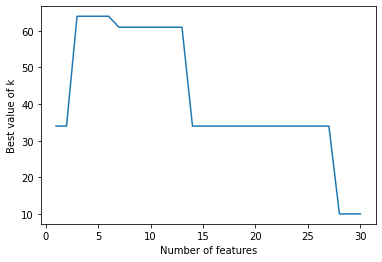

In [ ]:
#Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

x=np.linspace(1,len(original_dataset.feature_names),len(original_dataset.feature_names))
plt.xlabel('Number of features')
plt.ylabel('Best value of k')
plt.plot(x,bestklist[::-1])
  
plt.show()

## Part 4: Standardization [1.5 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[0.5]**

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 0.95\%.  **[0.5]**
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) **[0.5]**

Answer (check part 3 and part 4 results)
We can clearly see that standarization improved our model performance. As expected and clearly explained in part 1. For 30 features our model gave a best validation accuracy of approx. 0.93 for k=10 on unormalized data and approx. 0.97 for k=10 on normalized data. We can also notice that in the unormalized case in part 3 that removing two features (training with 28 features)  did not affect the model performance (validation accuracy did not drop = 0.93452 and k=10). However in the case of normalized data (with a uniform scale throughout all the features) the best validation accuracy is achieved on 30 features and drops slightly each time a feature is dropped from the training data. This also enforce our claim that the features contribution's is better for our algorithm training when normalizing.

In [ ]:
from sklearn import preprocessing
import numpy as np

In [ ]:

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_normalized=scaler.transform(X_train)
X_test_normalized=scaler.transform(X_test)


In [ ]:
removed_featuresn,best_meancrossvaln,bestklistn=Feature_selector (X_train_normalized , y_train ,0.95)
print("The list of the removed features: ",removed_featuresn)
print("The best mean cross-validation accuracy after removing each feature: ",best_meancrossvaln)
print("Best k values (corresponding to highest validation) when a feature was removed: ",bestklistn)

The list of the removed features:  ['mean radius', 'mean texture', 'mean area', 'mean smoothness', 'mean compactness', 'mean perimeter', 'mean concavity', 'mean concave points', 'mean fractal dimension', 'texture error', 'perimeter error', 'compactness error', 'concavity error', 'smoothness error', 'concave points error', 'symmetry error', 'worst perimeter', 'worst smoothness', 'worst fractal dimension', 'worst radius', 'fractal dimension error', 'radius error', 'worst compactness', 'worst texture', 'mean symmetry', 'worst symmetry', 'worst concavity', 'area error', 'worst area']
The best mean cross-validation accuracy after removing each feature:  [0.9674367088607594, 0.9649683544303798, 0.9623417721518986, 0.9623417721518986, 0.9572784810126581, 0.9598417721518986, 0.9623417721518986, 0.9573101265822783, 0.9573101265822785, 0.9548101265822785, 0.9573417721518988, 0.9573417721518986, 0.9572784810126581, 0.9598101265822784, 0.9648734177215189, 0.9673417721518988, 0.9623417721518986, 0.

In [ ]:
removed_featuresn_df=pd.DataFrame(np.array(removed_featuresn),columns=['Dropped least important features from X_train after each iteration'])
removed_featuresn_df

,Dropped least important features from X_train after each iteration
0,mean radius
1,mean texture
2,mean area
3,mean smoothness
4,mean compactness
5,mean perimeter
6,mean concavity
7,mean concave points
8,mean fractal dimension
9,texture error


In [ ]:
bestvalandkdfn=pd.DataFrame(np.concatenate((np.array(best_meancrossvaln).reshape(-1,1), np.array(bestklistn).reshape(-1,1)), axis=1),columns=['Best mean cross-validation accuracy','Corresponding first best k value'])
bestvalandkdfn

,Best mean cross-validation accuracy,Corresponding first best k value
0,0.967437,10.0
1,0.964968,8.0
2,0.962342,4.0
3,0.962342,5.0
4,0.957278,6.0
5,0.959842,7.0
6,0.962342,7.0
7,0.957310,7.0
8,0.957310,8.0
9,0.954810,7.0


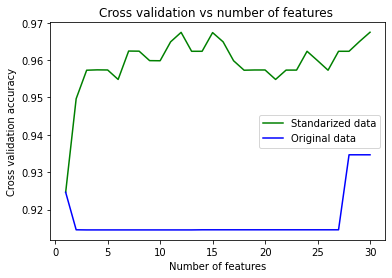

In [ ]:
x=np.linspace(1,len(original_dataset.feature_names),len(original_dataset.feature_names))
plt.plot(x,best_meancrossvaln[::-1], 'g',label='Standarized data')
plt.plot(x,best_meancrossval[::-1], 'b',label='Original data')
plt.title('Cross validation vs number of features ')
plt.xlabel('Number of features')
plt.ylabel('Cross validation accuracy')
plt.legend()
plt.show()

## Part 5: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results. **[0.5]**

In my opinion a 95.9% testing accuracy is good. In other words 4 of 100 people will be diagnosed wrongly. Which is acceptable and can be more improved for situation where the medical dr/patient is doubting the results by performing the medical test (testing our model) and collecting medical information (collecting our features) two times because it is a delicate application that involves people's health and life.

In [ ]:
from sklearn.metrics import accuracy_score

optimal=max(best_meancrossvaln)
optimal_index=best_meancrossvaln.index(optimal)
print("The best cross validation accuracy is:", optimal, "for ",optimal_index," features removed and  k=10")

The best cross validation accuracy is: 0.9674367088607594 for  0  features removed and  k=10


In [ ]:
from sklearn.metrics import accuracy_score

knn_final = neighbors.KNeighborsClassifier(n_neighbors=10)
knn_final.fit(X_train_normalized, y_train)
testing_accuracy = accuracy_score(y_test, knn_final.predict(X_test_normalized))
print ("Test set accuracy: ", testing_accuracy * 100, "%")

Test set accuracy:  95.90643274853801 %


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/